SLEAP: 1.3.3
TensorFlow: 2.9.2
Numpy: 1.22.4
Python: 3.10.13
OS: macOS-14.2.1-arm64-arm-64bit
Error distance (50%): 3.584184437298773
Error distance (90%): 123.46056116288385
Error distance (95%): 153.2977736742971
mAP: 0.24257497688491503
mAR: 0.33307086614173226


OSError: No file or directory found at ../models/filter_16-stride_8.240425_031454.centered_instance/best_model.h5

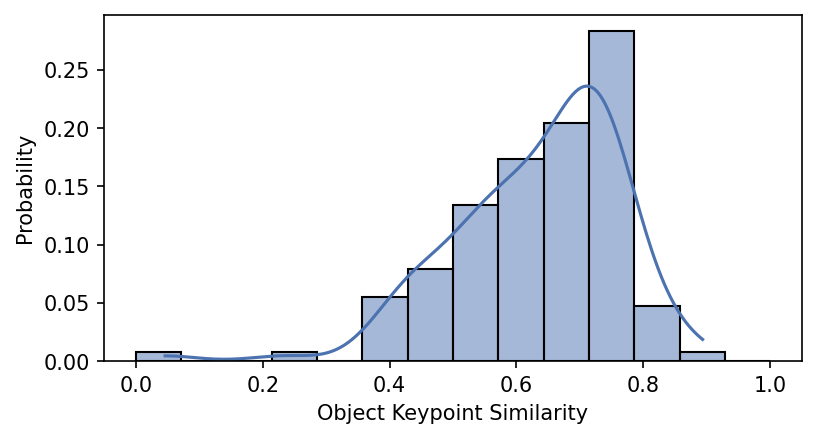

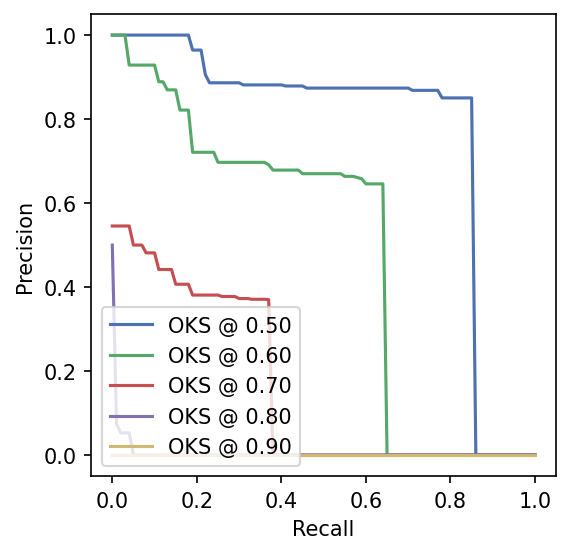

In [11]:
import sleap
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


mpl.style.use("seaborn-v0_8-deep")
sleap.versions()
metricsFile = "../models/filter_16-stride_8.240425_031454.centered_instance"
dataSet = "../datasets/col218_crop.v001.slp"
metrics = sleap.load_metrics(metricsFile, split="val")
#print("\n".join(metrics.keys()))

print("Error distance (50%):", metrics["dist.p50"])
print("Error distance (90%):", metrics["dist.p90"])
print("Error distance (95%):", metrics["dist.p95"])

plt.figure(figsize=(6, 3), dpi=150, facecolor="w")
sns.histplot(metrics["oks_voc.match_scores"].flatten(), binrange=(0, 1), kde=True, kde_kws={"clip": (0, 1)}, stat="probability")
plt.xlabel("Object Keypoint Similarity");

plt.figure(figsize=(4, 4), dpi=150, facecolor="w")
for precision, thresh in zip(metrics["oks_voc.precisions"][::2], metrics["oks_voc.match_score_thresholds"][::2]):
    plt.plot(metrics["oks_voc.recall_thresholds"], precision, "-", label=f"OKS @ {thresh:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left");

print("mAP:", metrics["oks_voc.mAP"])
print("mAR:", metrics["oks_voc.mAR"])

predictor = sleap.load_model(metricsFile)
labels_gt = sleap.load_file(dataSet)
labels_pr = predictor.predict(labels_gt)

metrics = sleap.nn.evals.evaluate(labels_gt, labels_pr)

print("Error distance (50%):", metrics["dist.p50"])
print("Error distance (90%):", metrics["dist.p90"])
print("Error distance (95%):", metrics["dist.p95"])
print("mAP:", metrics["oks_voc.mAP"])
print("mAR:", metrics["oks_voc.mAR"])